# Exercício

1. Leia e junte as duas bases relativas as variantes dos vinhos  
2. Crie uma variável binária com o valor 0 caso a nota for inferior a 7 (<) ou 1 caso contrário (>=).
3. Crie as amostras de treino e teste (30%) usando seed de 42.
4. Execute o stepwise e compare com o modelo completo.
5. Divida a base de treino em treino e validação (30%) usando seed de
84.
6. Otimize o valor de lambda usando lasso e compare com os ajustes anteriores.
7. Faça o mesmo para o Ridge.

In [1]:
import pandas as pd

In [8]:
red_wine = pd.read_csv("data/winequality-red.csv", sep=";")

In [9]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
white_wine = pd.read_csv("data/winequality-white.csv", sep=";")

In [11]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
white_wine.shape

(4898, 12)

In [13]:
red_wine.shape

(1599, 12)

In [14]:
data = pd.concat([white_wine, red_wine])

In [15]:
data.shape

(6497, 12)

In [16]:
data["target"] = data["quality"].apply(lambda x : 1 if x>= 7 else 0)

In [20]:
data[["target", "quality"]].head()

,target,quality
0,0,6
1,0,6
2,0,6
3,0,6
4,0,6


In [23]:
TARGET = "target"

In [26]:
features = [col for col in data.columns if col not in ["quality", "target"]]

In [27]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features],
                                                    data[TARGET],
                                                    test_size=0.3,
                                                    random_state=42)

In [32]:
X_train.shape

(4547, 11)

In [33]:
X_test.shape

(1950, 11)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred_test = model.predict_proba(X_test)

/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
pred_test = pred_test[:, 1]

In [42]:
roc_auc_score(y_test, pred_test)

0.8023929769284642

In [45]:
step_aucs = []
for i in range(len(features)):
    step_features = features[:i+1]
    model = LogisticRegression()
    model.fit(X_train[step_features], 
              y_train)
    pred_test = model.predict_proba(X_test[step_features])
    pred_test = pred_test[:, 1]
    step_aucs.append(roc_auc_score(y_test, pred_test))

/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/logisti

In [46]:
step_aucs

[0.5629449672410057,
 0.6036228877964559,
 0.6036514395986625,
 0.6367471771504966,
 0.6598052767089513,
 0.6608432186950483,
 0.6740223946900366,
 0.6741853079143916,
 0.6770035387439558,
 0.6797713840402144,
 0.8023677841618115]

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X_train[features],
                                                  y_train,
                                                  test_size=0.3,
                                                  random_state=42)

In [49]:
X_train.shape

(3182, 11)

In [50]:
X_val.shape

(1365, 11)

In [51]:
X_test.shape

(1950, 11)

In [79]:
from sklearn.linear_model import Lasso

n_coefs = []
lasso_aucs = []
alphas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test[step_features])
    lasso_aucs.append(roc_auc_score(y_test, pred_test))
    print(model.coef_)
    n_coefs.append(sum(model.coef_ != 0))

[ 6.47180231e-02 -2.36205824e-01 -2.75959213e-02  2.67558472e-02
 -2.26092726e-01  1.98142694e-03 -8.73809028e-04 -5.10070997e+01
  2.86705350e-01  3.06333120e-01  7.56763745e-02]
[ 4.50660297e-02 -2.75155048e-01 -2.68505725e-02  1.96666701e-02
 -3.14663748e-01  1.98240287e-03 -7.89925990e-04 -3.17056543e+01
  1.92960221e-01  2.66327154e-01  9.84356401e-02]
[ 0.01229886 -0.33810106 -0.02160256  0.00802831 -0.37004506  0.00197866
 -0.00064515 -0.          0.03666721  0.19142467  0.13653652]
[ 0.00876184 -0.29686484 -0.          0.00770127 -0.          0.00199956
 -0.00062193 -0.          0.          0.12526511  0.13911439]
[ 0.00249351 -0.          0.          0.00627235 -0.          0.00225883
 -0.00041602 -0.         -0.          0.          0.13535839]
[-0.         -0.          0.          0.         -0.          0.00174952
 -0.0004472  -0.         -0.          0.          0.06180224]
[-0.         -0.          0.         -0.         -0.          0.
 -0.00012322 -0.          0.       

/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/lgmoneda/miniconda2/envs/fia/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [80]:
n_coefs

[11, 11, 10, 7, 5, 3, 1, 0]

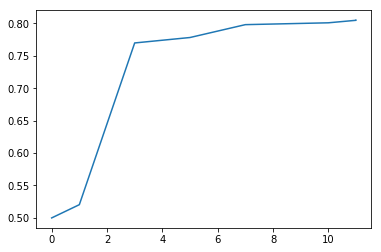

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(n_coefs, lasso_aucs)
plt.show()

In [83]:
from sklearn.linear_model import Ridge

n_coefs = []
ridge_aucs = []
alphas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test[step_features])
    ridge_aucs.append(roc_auc_score(y_test, pred_test))
    print(model.coef_)
    n_coefs.append(sum(model.coef_ != 0))

[ 6.47180231e-02 -2.36205824e-01 -2.75959213e-02  2.67558472e-02
 -2.26092726e-01  1.98142694e-03 -8.73809028e-04 -5.10070997e+01
  2.86705350e-01  3.06333120e-01  7.56763745e-02]
[ 6.44058980e-02 -2.36828734e-01 -2.75927492e-02  2.66428600e-02
 -2.27698523e-01  1.98145455e-03 -8.72487436e-04 -5.06995134e+01
  2.85216381e-01  3.05715389e-01  7.60375224e-02]
[ 6.17574579e-02 -2.42114275e-01 -2.75658542e-02  2.56841428e-02
 -2.41322988e-01  1.98168869e-03 -8.61273341e-04 -4.80895854e+01
  2.72582207e-01  3.00473749e-01  7.91019404e-02]
[ 4.51739078e-02 -2.75212586e-01 -2.73988063e-02  1.96810525e-02
 -3.26567584e-01  1.98314867e-03 -7.91045991e-04 -3.17471902e+01
  1.93472347e-01  2.67647324e-01  9.82908007e-02]
[ 2.02844867e-02 -3.24938015e-01 -2.71787268e-02  1.06722479e-02
 -4.52995537e-01  1.98520207e-03 -6.85445017e-04 -7.21985285e+00
  7.47550453e-02  2.18261579e-01  1.27104230e-01]
[ 1.37976516e-02 -3.38420007e-01 -2.74447109e-02  8.33477003e-03
 -4.69316248e-01  1.98424636e-03 -6

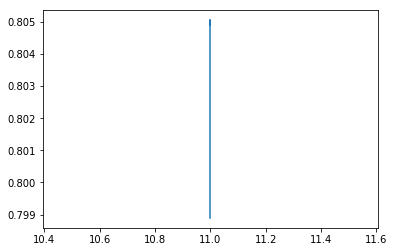

In [84]:
plt.plot(n_coefs, ridge_aucs)
plt.show()

Por que aconteceu o resultado acima?

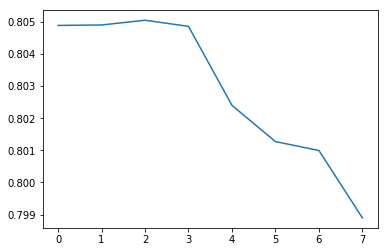

In [86]:
plt.plot(ridge_aucs)
plt.show()